<a href="https://colab.research.google.com/github/andrewburner/MSDS-410/blob/master/MSDS458_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
keras.__version__

'2.5.0'

In [2]:
tf.__version__

'2.5.0'

In [3]:
# neccessary for K.gradient to work in TensorFlow 2.x
# only needed for the "Finding a pattern the hidden node maximally responds to" section below.
# but disabled to make Tensorboard work...
tf.compat.v1.disable_eager_execution() 

In [4]:
# To get consistint results each time we rerun the code.
keras.backend.clear_session()
np.random.seed(1234)
tf.random.set_seed(1234)

In [5]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
train_images.shape, test_images.shape, test_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (10000,), (10000,))

**Experiment 1**

In [7]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [8]:
val_images, train_images = train_images[:5000], train_images[5000:] 
val_labels, train_labels = train_labels[:5000], train_labels[5000:]

In [9]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(1, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

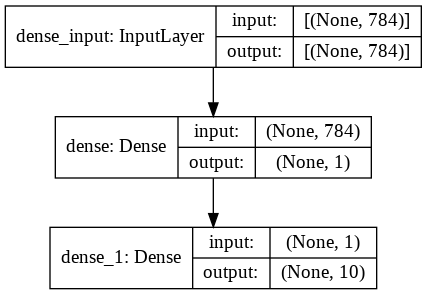

In [10]:
keras.utils.plot_model(model, "mnist_model_1hnode.png", show_shapes=True) # plot a graph of the model

In [11]:
model.summary() # prints a summary representation of the odel

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 785       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20        
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [12]:
# For use with non-categorical labels
model.compile(optimizer='rmsprop',           
# model.compile(optimizer=keras.optimizers.SGD(lr=1e-3),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 35us/sample - loss: 1.9713 - accuracy: 0.2039 - val_loss: 1.8820 - val_accuracy: 0.2138
Epoch 2/30
 1920/55000 [>.............................] - ETA: 1s - loss: 1.9098 - accuracy: 0.2026

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 2s 31us/sample - loss: 1.8526 - accuracy: 0.2267 - val_loss: 1.8028 - val_accuracy: 0.2492
Epoch 3/30
55000/55000 [==============================] - 2s 31us/sample - loss: 1.7823 - accuracy: 0.2632 - val_loss: 1.7495 - val_accuracy: 0.3174
Epoch 4/30
55000/55000 [==============================] - 2s 30us/sample - loss: 1.7420 - accuracy: 0.2914 - val_loss: 1.7149 - val_accuracy: 0.3134
Epoch 5/30
55000/55000 [==============================] - 2s 30us/sample - loss: 1.7178 - accuracy: 0.3104 - val_loss: 1.6989 - val_accuracy: 0.3272
Epoch 6/30
55000/55000 [==============================] - 2s 30us/sample - loss: 1.7004 - accuracy: 0.3286 - val_loss: 1.6837 - val_accuracy: 0.3506
Epoch 7/30
55000/55000 [==============================] - 2s 30us/sample - loss: 1.6859 - accuracy: 0.3463 - val_loss: 1.6676 - val_accuracy: 0.3548
Epoch 8/30
55000/55000 [==============================] - 2s 30us/sample - loss: 1.6711 - accuracy: 0.3542 - val_loss

In [14]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:00:51.150066


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [16]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.3944000005722046, test loss: 1.584922840309143


In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

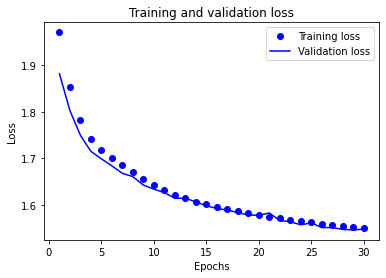

In [18]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

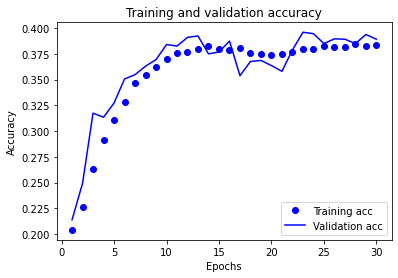

In [19]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [21]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[4333,    8,   67,   17,    0,  405,  567,    0,   47,    0],
       [  13, 5221,   22,  358,    0,   10,    6,    0,   66,  483],
       [ 501,  282,  995,  936,    0, 1123,  344,    6, 1272,   11],
       [  32, 1011,  620, 1853,    0,  372,   63,   54, 1459,  174],
       [  28, 1976,  238, 2022,    0,  153,   37,   42,  684,  127],
       [ 239,  166, 1080,  319,    0, 2021,  483,   38,  623,   18],
       [4118,    5,  114,   35,    0,  456,  635,    0,   54,    0],
       [   1,  959,   20,  118,    0,   14,    4, 3652,   35,  912],
       [  60,  732, 1113, 1171,    0,  744,  113,   11, 1410,   35],
       [  13, 2141,   32,  313,    0,   21,    9, 1545,  113, 1267]])

In [22]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

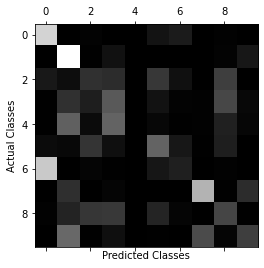

In [23]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [24]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

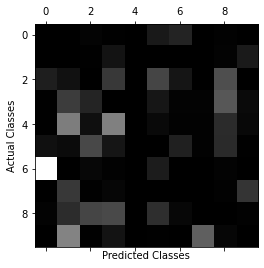

In [25]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

**Experiment 2**

In [26]:
model = models.Sequential()
model.add(layers.Dense(2, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

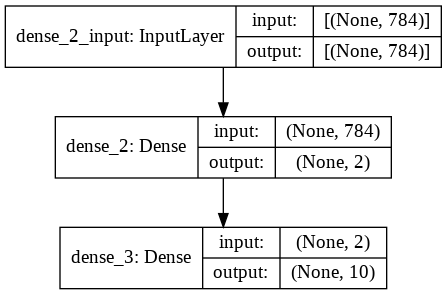

In [27]:
keras.utils.plot_model(model, "mnist_model_2hnode.png", show_shapes=True)

In [28]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',              
              metrics=['accuracy'])

In [29]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 39us/sample - loss: 1.6202 - accuracy: 0.4309 - val_loss: 1.3550 - val_accuracy: 0.5684
Epoch 2/30
   32/55000 [..............................] - ETA: 11s - loss: 1.5849 - accuracy: 0.4688

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 2s 36us/sample - loss: 1.2863 - accuracy: 0.5883 - val_loss: 1.2133 - val_accuracy: 0.6234
Epoch 3/30
55000/55000 [==============================] - 2s 35us/sample - loss: 1.2007 - accuracy: 0.6057 - val_loss: 1.1562 - val_accuracy: 0.6334
Epoch 4/30
55000/55000 [==============================] - 2s 35us/sample - loss: 1.1546 - accuracy: 0.6128 - val_loss: 1.1104 - val_accuracy: 0.6380
Epoch 5/30
55000/55000 [==============================] - 2s 35us/sample - loss: 1.1057 - accuracy: 0.6242 - val_loss: 1.0525 - val_accuracy: 0.6548
Epoch 6/30
55000/55000 [==============================] - 2s 36us/sample - loss: 1.0531 - accuracy: 0.6505 - val_loss: 1.0071 - val_accuracy: 0.6854
Epoch 7/30
55000/55000 [==============================] - 2s 36us/sample - loss: 1.0169 - accuracy: 0.6721 - val_loss: 0.9786 - val_accuracy: 0.6972
Epoch 8/30
55000/55000 [==============================] - 2s 35us/sample - loss: 0.9958 - accuracy: 0.6781 - val_loss

In [30]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:00:59.088314


In [31]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [32]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.6965000033378601, test loss: 0.9423743728637696


In [33]:
history_dict = history.history

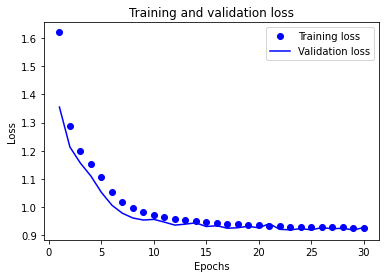

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

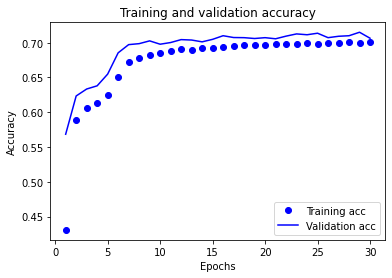

In [35]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [36]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [37]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[4321,   13,  618,  310,    3,  115,   13,    0,   51,    0],
       [   3, 5765,   66,    0,   59,   10,  120,    1,  144,   11],
       [ 448,  179, 3565,   61,   27,  103,  904,    8,  168,    7],
       [ 519,   19,  291, 2561,   12, 1466,   10,  239,  472,   49],
       [   3,  450,   40,    1, 4289,    7,   35,    2,  129,  351],
       [ 119,   71,  439,  914,   26, 1911,   45,  249, 1174,   39],
       [   4,  149,  365,    1,    6,    8, 4852,    0,   32,    0],
       [   5,   39,   21,  125,  116,  464,    3, 4025,  309,  608],
       [  29,  654,  256,  217,  128,  798,   56,  203, 2942,  106],
       [   7,   36,   15,   41,  704,  111,    4,  256,  214, 4066]])

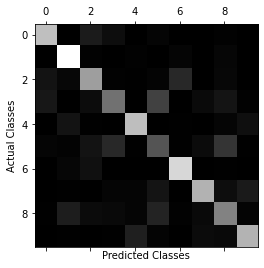

In [38]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [39]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

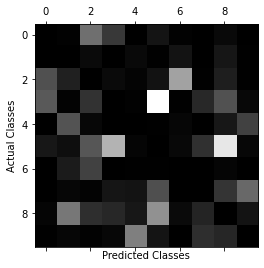

In [40]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

# **Experiment 3**

In [41]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

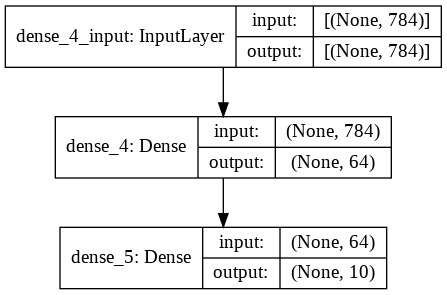

In [42]:
keras.utils.plot_model(model, "mnist_model_2hnode.png", show_shapes=True)

In [43]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',              
              metrics=['accuracy'])

In [44]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 49us/sample - loss: 0.3081 - accuracy: 0.9134 - val_loss: 0.1742 - val_accuracy: 0.9500
Epoch 2/30
   32/55000 [..............................] - ETA: 12s - loss: 0.2763 - accuracy: 0.8750

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 3s 48us/sample - loss: 0.1604 - accuracy: 0.9535 - val_loss: 0.1365 - val_accuracy: 0.9622
Epoch 3/30
55000/55000 [==============================] - 3s 47us/sample - loss: 0.1232 - accuracy: 0.9638 - val_loss: 0.1131 - val_accuracy: 0.9674
Epoch 4/30
55000/55000 [==============================] - 3s 49us/sample - loss: 0.1005 - accuracy: 0.9704 - val_loss: 0.1021 - val_accuracy: 0.9698
Epoch 5/30
55000/55000 [==============================] - 3s 48us/sample - loss: 0.0857 - accuracy: 0.9754 - val_loss: 0.1097 - val_accuracy: 0.9700
Epoch 6/30
55000/55000 [==============================] - 3s 46us/sample - loss: 0.0750 - accuracy: 0.9783 - val_loss: 0.1010 - val_accuracy: 0.9710
Epoch 7/30
55000/55000 [==============================] - 3s 46us/sample - loss: 0.0676 - accuracy: 0.9804 - val_loss: 0.0961 - val_accuracy: 0.9726
Epoch 8/30
55000/55000 [==============================] - 3s 48us/sample - loss: 0.0620 - accuracy: 0.9824 - val_loss

In [45]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:01:18.750723


In [46]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [47]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9750999808311462, test loss: 0.14224925001114033


In [48]:
history_dict = history.history

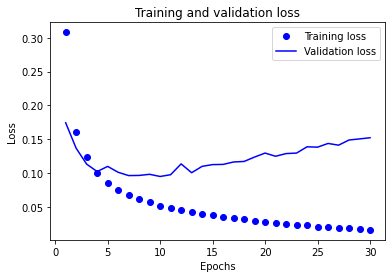

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

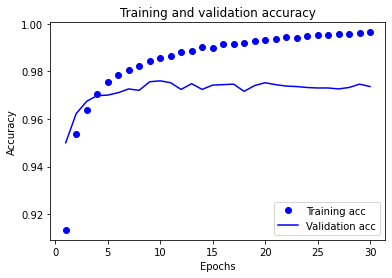

In [50]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [51]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [52]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[5440,    0,    1,    0,    0,    0,    0,    0,    3,    0],
       [   1, 6170,    0,    0,    0,    0,    0,    3,    4,    1],
       [   1,    3, 5458,    1,    1,    0,    0,    2,    4,    0],
       [   1,    1,    5, 5617,    0,    2,    0,    5,    6,    1],
       [   0,    0,    2,    0, 5300,    0,    1,    1,    0,    3],
       [   1,    0,    0,    3,    1, 4973,    3,    0,    4,    2],
       [   2,    0,    1,    0,    2,    2, 5409,    0,    1,    0],
       [   1,    4,    4,    0,    0,    0,    0, 5701,    3,    2],
       [   0,    3,    1,    0,    0,    0,    0,    1, 5382,    2],
       [   1,    0,    0,    0,    2,    3,    1,    6,    4, 5437]])

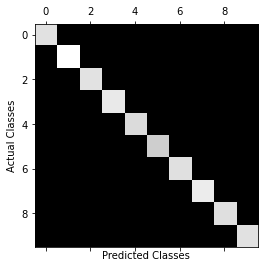

In [53]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [54]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

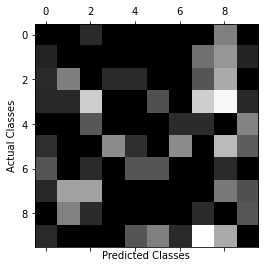

In [55]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()



```
# This is formatted as code
```

# **Experiment 3 - 128 nodes**

In [56]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

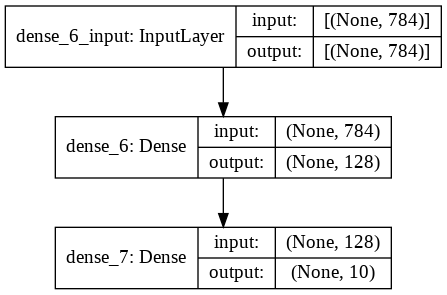

In [57]:
keras.utils.plot_model(model, "mnist_model_2hnode.png", show_shapes=True)

In [58]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',              
              metrics=['accuracy'])

In [59]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 80us/sample - loss: 0.2675 - accuracy: 0.9235 - val_loss: 0.1371 - val_accuracy: 0.9602
Epoch 2/30
   32/55000 [..............................] - ETA: 12s - loss: 0.0157 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 4s 75us/sample - loss: 0.1257 - accuracy: 0.9629 - val_loss: 0.1058 - val_accuracy: 0.9692
Epoch 3/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.0917 - accuracy: 0.9731 - val_loss: 0.0896 - val_accuracy: 0.9738
Epoch 4/30
55000/55000 [==============================] - 4s 72us/sample - loss: 0.0740 - accuracy: 0.9789 - val_loss: 0.0887 - val_accuracy: 0.9738
Epoch 5/30
55000/55000 [==============================] - 4s 74us/sample - loss: 0.0618 - accuracy: 0.9827 - val_loss: 0.0822 - val_accuracy: 0.9774
Epoch 6/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.0525 - accuracy: 0.9850 - val_loss: 0.0945 - val_accuracy: 0.9744
Epoch 7/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.0468 - accuracy: 0.9864 - val_loss: 0.0874 - val_accuracy: 0.9762
Epoch 8/30
55000/55000 [==============================] - 4s 79us/sample - loss: 0.0403 - accuracy: 0.9892 - val_loss

In [60]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:02:10.847501


In [61]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [62]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9771999716758728, test loss: 0.16375025990561307


In [63]:
history_dict = history.history

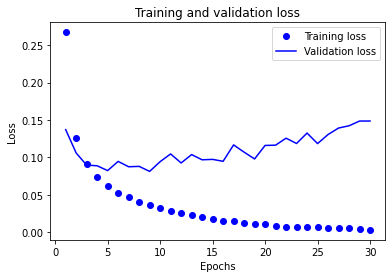

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

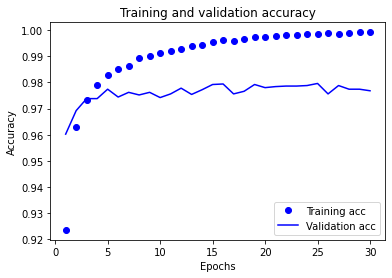

In [65]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [66]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [67]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[5444,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6178,    0,    0,    0,    0,    0,    0,    1,    0],
       [   0,    1, 5468,    0,    0,    0,    0,    1,    0,    0],
       [   1,    0,    0, 5634,    0,    0,    0,    1,    1,    1],
       [   0,    0,    0,    0, 5304,    0,    1,    2,    0,    0],
       [   0,    0,    0,    0,    0, 4987,    0,    0,    0,    0],
       [   1,    0,    0,    0,    0,    0, 5416,    0,    0,    0],
       [   0,    2,    0,    0,    0,    0,    0, 5712,    0,    1],
       [   0,    0,    0,    0,    0,    0,    1,    1, 5387,    0],
       [   0,    0,    1,    0,    2,    0,    0,    6,    2, 5443]])

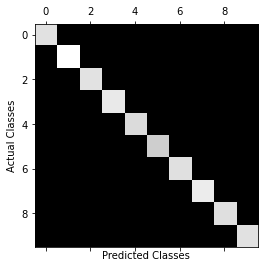

In [68]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [69]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

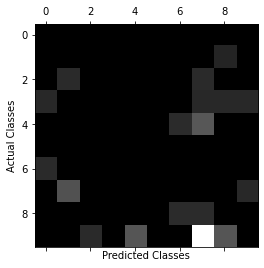

In [70]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

# **Experiment 3 - 256 nodes**

In [71]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

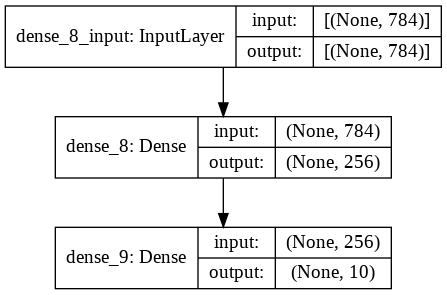

In [72]:
keras.utils.plot_model(model, "mnist_model_2hnode.png", show_shapes=True)

In [73]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',              
              metrics=['accuracy'])

In [74]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
54624/55000 [============================>.] - ETA: 0s - loss: 0.2352 - accuracy: 0.9307

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 7s 122us/sample - loss: 0.2348 - accuracy: 0.9309 - val_loss: 0.1228 - val_accuracy: 0.9654
Epoch 2/30
55000/55000 [==============================] - 7s 122us/sample - loss: 0.1059 - accuracy: 0.9689 - val_loss: 0.0921 - val_accuracy: 0.9724
Epoch 3/30
55000/55000 [==============================] - 7s 120us/sample - loss: 0.0757 - accuracy: 0.9775 - val_loss: 0.0966 - val_accuracy: 0.9738
Epoch 4/30
55000/55000 [==============================] - 7s 120us/sample - loss: 0.0597 - accuracy: 0.9832 - val_loss: 0.0991 - val_accuracy: 0.9712
Epoch 5/30
55000/55000 [==============================] - 6s 116us/sample - loss: 0.0482 - accuracy: 0.9861 - val_loss: 0.0854 - val_accuracy: 0.9772
Epoch 6/30
55000/55000 [==============================] - 6s 112us/sample - loss: 0.0423 - accuracy: 0.9886 - val_loss: 0.0910 - val_accuracy: 0.9770
Epoch 7/30
55000/55000 [==============================] - 6s 105us/sample - loss: 0.0333 - accuracy: 0.9907 - v

In [75]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:03:05.150886


In [76]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [77]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9803000092506409, test loss: 0.1827572291425764


In [78]:
history_dict = history.history

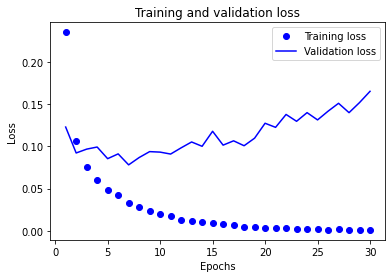

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

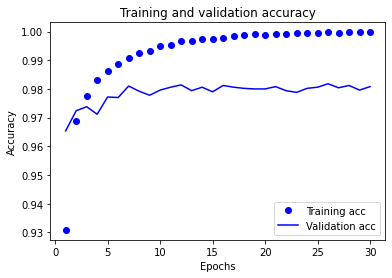

In [80]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [81]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [82]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[5444,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6178,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0,    0, 5470,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    1, 5637,    0,    0,    0,    0,    0,    0],
       [   0,    1,    0,    0, 5305,    0,    0,    1,    0,    0],
       [   0,    0,    0,    0,    0, 4987,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5417,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 5715,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    1, 5388,    0],
       [   0,    0,    0,    0,    2,    1,    0,    3,    0, 5448]])

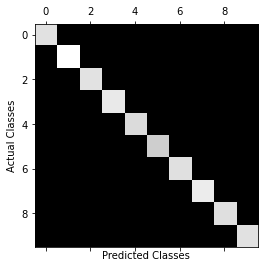

In [83]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [84]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

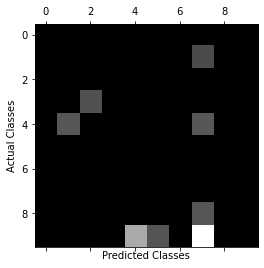

In [85]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

# **Experiment 3 - 512 nodes**

In [86]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

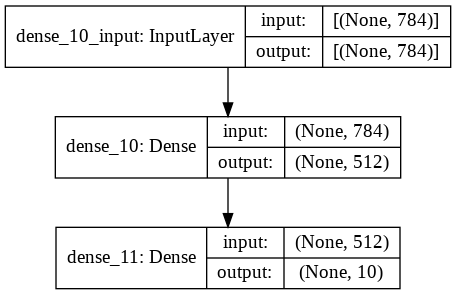

In [87]:
keras.utils.plot_model(model, "mnist_model_2hnode.png", show_shapes=True)

In [88]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',              
              metrics=['accuracy'])

In [89]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
54784/55000 [============================>.] - ETA: 0s - loss: 0.2122 - accuracy: 0.9367

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 10s 174us/sample - loss: 0.2121 - accuracy: 0.9368 - val_loss: 0.1149 - val_accuracy: 0.9660
Epoch 2/30
55000/55000 [==============================] - 9s 170us/sample - loss: 0.0925 - accuracy: 0.9727 - val_loss: 0.0787 - val_accuracy: 0.9760
Epoch 3/30
55000/55000 [==============================] - 9s 172us/sample - loss: 0.0667 - accuracy: 0.9805 - val_loss: 0.0781 - val_accuracy: 0.9786
Epoch 4/30
55000/55000 [==============================] - 9s 173us/sample - loss: 0.0525 - accuracy: 0.9851 - val_loss: 0.0800 - val_accuracy: 0.9780
Epoch 5/30
55000/55000 [==============================] - 10s 178us/sample - loss: 0.0410 - accuracy: 0.9888 - val_loss: 0.0795 - val_accuracy: 0.9816
Epoch 6/30
55000/55000 [==============================] - 10s 178us/sample - loss: 0.0346 - accuracy: 0.9908 - val_loss: 0.0976 - val_accuracy: 0.9770
Epoch 7/30
55000/55000 [==============================] - 10s 178us/sample - loss: 0.0275 - accuracy: 0.9927

In [90]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:04:57.678677


In [91]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [92]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9811000227928162, test loss: 0.18484957393088022


In [93]:
history_dict = history.history

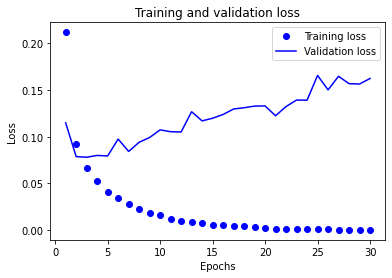

In [94]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

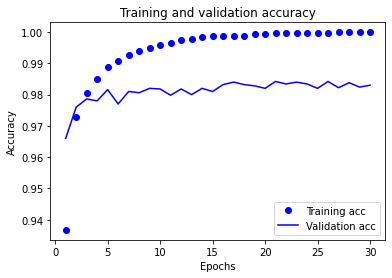

In [95]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [96]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [97]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[5444,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6177,    0,    0,    0,    0,    0,    0,    2,    0],
       [   0,    0, 5470,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 5636,    0,    0,    0,    0,    2,    0],
       [   0,    0,    0,    0, 5307,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 4987,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5417,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 5715,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5389,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5454]])

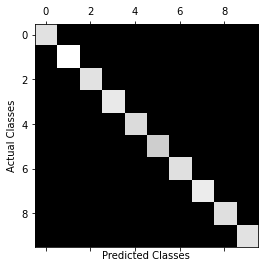

In [98]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [99]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

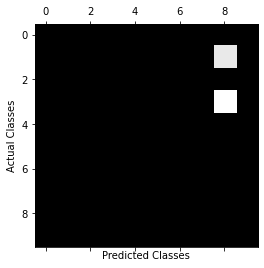

In [100]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

# **Experiment 4 - PCA**

In [101]:
from sklearn.decomposition import PCA

In [102]:
pca = PCA(n_components=0.95)
train_images_red = pca.fit_transform(train_images)
val_images_red = pca.transform(val_images)
test_images_red = pca.transform(test_images)

In [103]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(154,)))
model.add(layers.Dense(10, activation='softmax'))  

# For use with non-categorical labels
model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


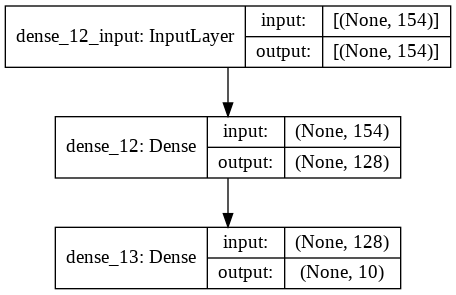

In [104]:
keras.utils.plot_model(model, "mnist_model_1hnode.png", show_shapes=True)

In [105]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               19840     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 21,130
Trainable params: 21,130
Non-trainable params: 0
_________________________________________________________________


In [106]:
start_time = datetime.now()
history = model.fit(train_images_red, train_labels, epochs=30,
                    validation_data=(val_images_red, val_labels))
end_time = datetime.now()

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 43us/sample - loss: 0.3173 - accuracy: 0.9129 - val_loss: 0.1490 - val_accuracy: 0.9574
Epoch 2/30
   32/55000 [..............................] - ETA: 7s - loss: 0.0082 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 2s 39us/sample - loss: 0.1196 - accuracy: 0.9660 - val_loss: 0.1074 - val_accuracy: 0.9684
Epoch 3/30
55000/55000 [==============================] - 2s 40us/sample - loss: 0.0807 - accuracy: 0.9775 - val_loss: 0.0883 - val_accuracy: 0.9740
Epoch 4/30
55000/55000 [==============================] - 2s 40us/sample - loss: 0.0589 - accuracy: 0.9831 - val_loss: 0.0797 - val_accuracy: 0.9772
Epoch 5/30
55000/55000 [==============================] - 2s 41us/sample - loss: 0.0452 - accuracy: 0.9873 - val_loss: 0.0796 - val_accuracy: 0.9766
Epoch 6/30
55000/55000 [==============================] - 2s 39us/sample - loss: 0.0347 - accuracy: 0.9903 - val_loss: 0.0787 - val_accuracy: 0.9794
Epoch 7/30
55000/55000 [==============================] - 2s 40us/sample - loss: 0.0272 - accuracy: 0.9930 - val_loss: 0.0797 - val_accuracy: 0.9770
Epoch 8/30
55000/55000 [==============================] - 2s 40us/sample - loss: 0.0214 - accuracy: 0.9946 - val_loss

In [107]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:01:06.865903


In [108]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [109]:
print(f'''acc: {hist_dict['accuracy'][-1]:.4}, val acc: {hist_dict['val_accuracy'][-1]:.4},
loss: {hist_dict['loss'][-1]:.4}, val loss: {hist_dict['val_loss'][-1]:.4}''')

acc: 1.0, val acc: 0.9792,
loss: 0.0001835, val loss: 0.169


In [110]:
test_loss, test_acc = model.evaluate(test_images_red, test_labels)

In [111]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9764000177383423, test loss: 0.18184599265105106


In [112]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

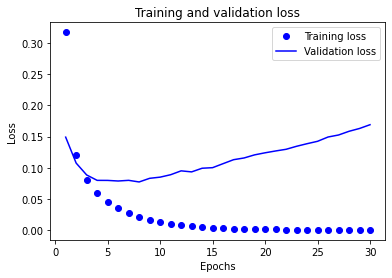

In [113]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

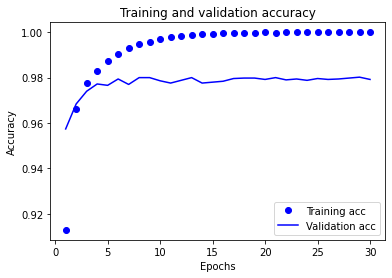

In [114]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# **Experiment 5 - Random Forest**

In [115]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(train_images,train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

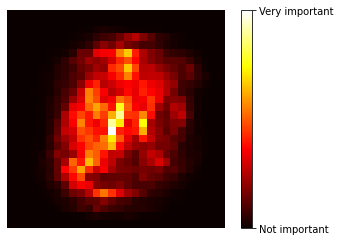

In [116]:
# https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

# plt.savefig("mnist_feature_importance_plot")
plt.show()

In [117]:
n = 70
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 70 "most important" features/pixels
len(idx)

70

In [118]:
train_images_sm = train_images[:,idx]
val_images_sm = val_images[:,idx]
test_images_sm = test_images[:,idx]
train_images_sm.shape, val_images.shape, test_images_sm.shape

((55000, 70), (5000, 784), (10000, 70))

In [119]:
def pair(n,size):
    x = n//size 
    y = n%size
    return x,y

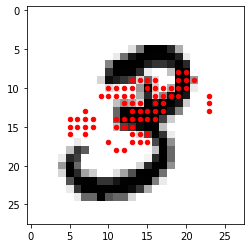

In [120]:
plt.imshow(train_images[1].reshape(28,28),cmap='binary')
x, y = np.array([pair(k,28) for k in idx]).T
plt.scatter(x,y,color='red',s=20)

In [121]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(70,)))
model.add(layers.Dense(10, activation='softmax'))  

# For use with non-categorical labels
model.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [122]:
start_time = datetime.now()
history = model.fit(train_images_sm, train_labels, epochs=30,
                    validation_data=(val_images_sm, val_labels))
end_time = datetime.now()

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 40us/sample - loss: 0.5808 - accuracy: 0.8283 - val_loss: 0.4053 - val_accuracy: 0.8806


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Epoch 2/30
55000/55000 [==============================] - 2s 37us/sample - loss: 0.3769 - accuracy: 0.8863 - val_loss: 0.3233 - val_accuracy: 0.9072
Epoch 3/30
55000/55000 [==============================] - 2s 38us/sample - loss: 0.3097 - accuracy: 0.9065 - val_loss: 0.2845 - val_accuracy: 0.9184
Epoch 4/30
55000/55000 [==============================] - 2s 36us/sample - loss: 0.2718 - accuracy: 0.9174 - val_loss: 0.2615 - val_accuracy: 0.9226
Epoch 5/30
55000/55000 [==============================] - 2s 37us/sample - loss: 0.2463 - accuracy: 0.9253 - val_loss: 0.2379 - val_accuracy: 0.9320
Epoch 6/30
55000/55000 [==============================] - 2s 37us/sample - loss: 0.2281 - accuracy: 0.9307 - val_loss: 0.2488 - val_accuracy: 0.9248
Epoch 7/30
55000/55000 [==============================] - 2s 36us/sample - loss: 0.2151 - accuracy: 0.9347 - val_loss: 0.2267 - val_accuracy: 0.9336
Epoch 8/30
55000/55000 [==============================] - 2s 37us/sample - loss: 0.2046 - accuracy: 0.9377

In [123]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:01:01.845919


In [124]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [125]:
print(f'''acc: {hist_dict['accuracy'][-1]:.4}, val acc: {hist_dict['val_accuracy'][-1]:.4},
loss: {hist_dict['loss'][-1]:.4}, val loss: {hist_dict['val_loss'][-1]:.4}''')

acc: 0.9592, val acc: 0.94,
loss: 0.1377, val loss: 0.2306


In [126]:
test_loss, test_acc = model.evaluate(test_images_sm, test_labels)

In [127]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9429000020027161, test loss: 0.22629460449833422


In [128]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

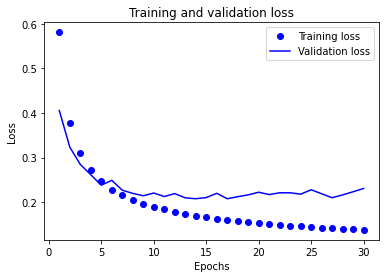

In [129]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

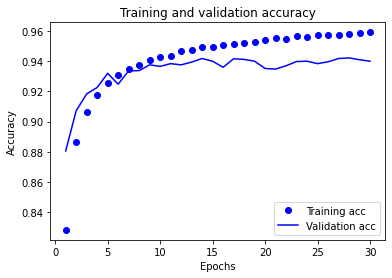

In [130]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# **Experiment 6 - tanh activation**

In [131]:
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

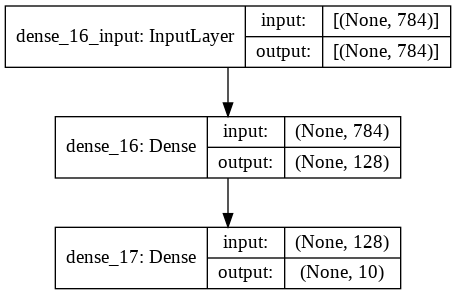

In [132]:
keras.utils.plot_model(model, "mnist_model_2hnode.png", show_shapes=True)

In [133]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',              
              metrics=['accuracy'])

In [134]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
54528/55000 [============================>.] - ETA: 0s - loss: 0.2907 - accuracy: 0.9153

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 4s 81us/sample - loss: 0.2901 - accuracy: 0.9154 - val_loss: 0.1765 - val_accuracy: 0.9518
Epoch 2/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.1470 - accuracy: 0.9568 - val_loss: 0.1213 - val_accuracy: 0.9684
Epoch 3/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.1064 - accuracy: 0.9681 - val_loss: 0.1019 - val_accuracy: 0.9716
Epoch 4/30
55000/55000 [==============================] - 4s 77us/sample - loss: 0.0841 - accuracy: 0.9756 - val_loss: 0.0893 - val_accuracy: 0.9728
Epoch 5/30
55000/55000 [==============================] - 4s 74us/sample - loss: 0.0687 - accuracy: 0.9804 - val_loss: 0.0888 - val_accuracy: 0.9738
Epoch 6/30
55000/55000 [==============================] - 4s 75us/sample - loss: 0.0583 - accuracy: 0.9831 - val_loss: 0.0845 - val_accuracy: 0.9752
Epoch 7/30
55000/55000 [==============================] - 4s 76us/sample - loss: 0.0495 - accuracy: 0.9858 - val_loss

In [135]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:02:07.758557


In [136]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [137]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9760000109672546, test loss: 0.10602612892084726


In [138]:
history_dict = history.history

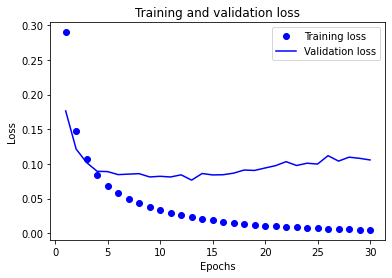

In [139]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

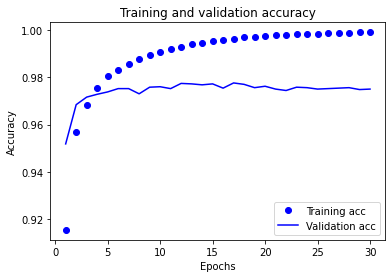

In [140]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [141]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [142]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[5443,    0,    0,    0,    0,    0,    1,    0,    0,    0],
       [   0, 6174,    1,    0,    0,    0,    0,    2,    2,    0],
       [   0,    0, 5467,    0,    0,    0,    0,    2,    1,    0],
       [   0,    0,    0, 5635,    0,    0,    0,    2,    0,    1],
       [   1,    0,    2,    0, 5301,    0,    1,    1,    0,    1],
       [   0,    0,    0,    0,    0, 4986,    1,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5417,    0,    0,    0],
       [   1,    0,    1,    0,    0,    0,    0, 5713,    0,    0],
       [   0,    1,    0,    0,    0,    0,    0,    1, 5387,    0],
       [   0,    0,    0,    0,    5,    0,    0,    3,    1, 5445]])

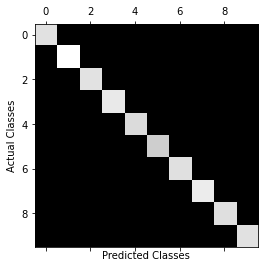

In [143]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [144]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

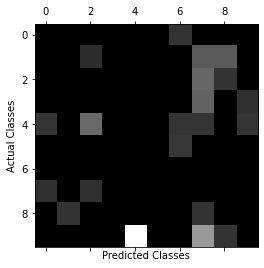

In [145]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

# **Experiment 7 - Adam optimization**

In [146]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

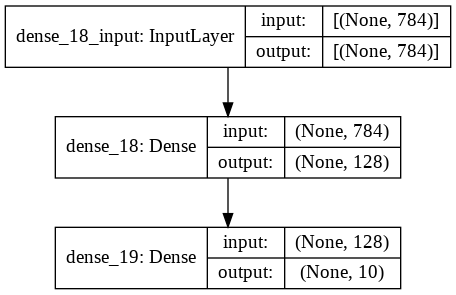

In [147]:
keras.utils.plot_model(model, "mnist_model_2hnode.png", show_shapes=True)

In [148]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',              
              metrics=['accuracy'])

In [149]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
54592/55000 [============================>.] - ETA: 0s - loss: 0.2682 - accuracy: 0.9238

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 4s 71us/sample - loss: 0.2674 - accuracy: 0.9240 - val_loss: 0.1388 - val_accuracy: 0.9584
Epoch 2/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.1176 - accuracy: 0.9659 - val_loss: 0.0942 - val_accuracy: 0.9732
Epoch 3/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.0798 - accuracy: 0.9756 - val_loss: 0.0816 - val_accuracy: 0.9756
Epoch 4/30
55000/55000 [==============================] - 4s 65us/sample - loss: 0.0603 - accuracy: 0.9817 - val_loss: 0.0851 - val_accuracy: 0.9744
Epoch 5/30
55000/55000 [==============================] - 4s 67us/sample - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.0779 - val_accuracy: 0.9750
Epoch 6/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.0369 - accuracy: 0.9883 - val_loss: 0.0781 - val_accuracy: 0.9762
Epoch 7/30
55000/55000 [==============================] - 4s 66us/sample - loss: 0.0294 - accuracy: 0.9911 - val_loss

In [150]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:01:50.124225


In [151]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [152]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.9781000018119812, test loss: 0.12834716011934658


In [153]:
history_dict = history.history

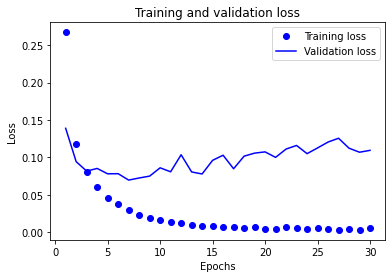

In [154]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

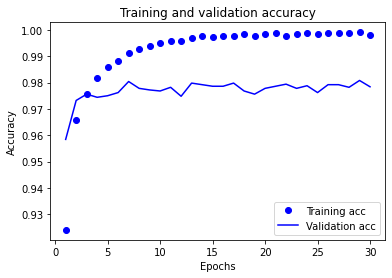

In [155]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [156]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [157]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[5443,    0,    0,    0,    0,    0,    0,    0,    0,    1],
       [   0, 6174,    2,    2,    0,    0,    0,    0,    1,    0],
       [   0,    0, 5466,    2,    0,    0,    0,    1,    0,    1],
       [   0,    0,    1, 5636,    0,    0,    0,    0,    0,    1],
       [   1,    0,    0,    0, 5298,    0,    0,    0,    0,    8],
       [   1,    0,    0,   14,    1, 4952,    0,    0,    3,   16],
       [   2,    0,    0,    0,    0,    1, 5414,    0,    0,    0],
       [   0,    0,    0,    4,    0,    0,    0, 5707,    0,    4],
       [   0,    0,    0,    3,    0,    0,    0,    1, 5384,    1],
       [   0,    0,    0,    0,    1,    0,    0,    0,    0, 5453]])

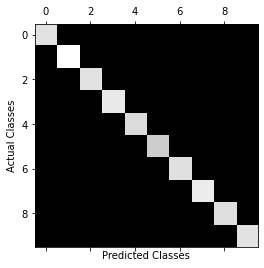

In [158]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [159]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

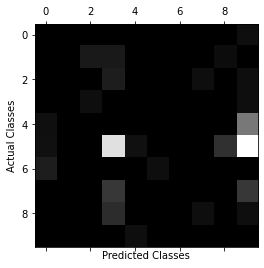

In [160]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()

# **Last Experiment - tanh and adam**

In [161]:
model = models.Sequential()
model.add(layers.Dense(128, activation='tanh', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

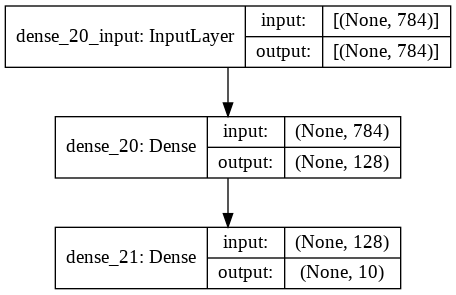

In [162]:
keras.utils.plot_model(model, "mnist_model_2hnode.png", show_shapes=True)

In [163]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',              
              metrics=['accuracy'])

In [164]:
start_time = datetime.now()
history = model.fit(train_images, train_labels, epochs=30,
                    validation_data=(val_images, val_labels))
end_time = datetime.now()


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
54688/55000 [============================>.] - ETA: 0s - loss: 0.3010 - accuracy: 0.9140

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


55000/55000 [==============================] - 3s 63us/sample - loss: 0.3006 - accuracy: 0.9141 - val_loss: 0.1735 - val_accuracy: 0.9492
Epoch 2/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.1447 - accuracy: 0.9576 - val_loss: 0.1144 - val_accuracy: 0.9684
Epoch 3/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.0983 - accuracy: 0.9713 - val_loss: 0.0994 - val_accuracy: 0.9710
Epoch 4/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.0720 - accuracy: 0.9788 - val_loss: 0.0886 - val_accuracy: 0.9720
Epoch 5/30
55000/55000 [==============================] - 3s 60us/sample - loss: 0.0546 - accuracy: 0.9847 - val_loss: 0.0782 - val_accuracy: 0.9766
Epoch 6/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.0409 - accuracy: 0.9885 - val_loss: 0.0872 - val_accuracy: 0.9754
Epoch 7/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.0320 - accuracy: 0.9911 - val_loss

In [165]:
train_time = end_time - start_time
print(f'training time: {train_time}')

training time: 0:01:45.417159


In [166]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [167]:
print(f'test acc: {test_acc}, test loss: {test_loss}')

test acc: 0.977400004863739, test loss: 0.10280112887775449


In [168]:
history_dict = history.history

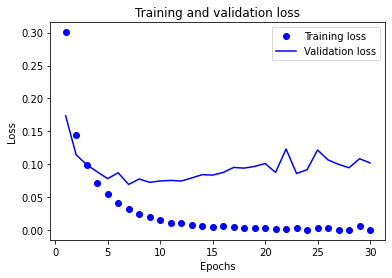

In [169]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

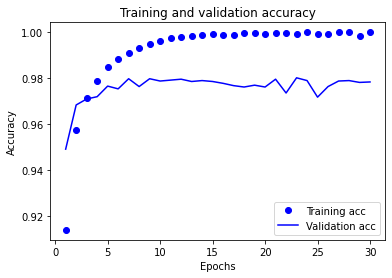

In [170]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [171]:
# Get the predicted classes:
pred_classes = np.argmax(model.predict(train_images), axis=-1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [172]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(train_labels,pred_classes)
conf_mx

array([[5444,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6178,    0,    0,    0,    0,    0,    0,    0,    1],
       [   0,    0, 5470,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 5638,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5307,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 4987,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 5417,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 5715,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 5389,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 5454]])

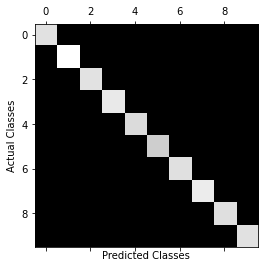

In [173]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()

In [174]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

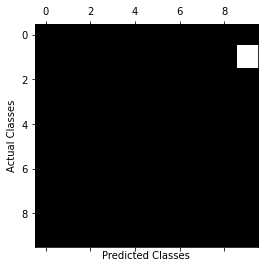

In [175]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
#plt.savefig("confusion_matrix_errors_plot_mnist_val", tight_layout=False)
plt.show()